## Simple linear regression using least square

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (20.0,10.0)

In [2]:
#Reading Data

In [3]:
data = pd.read_csv('headbrain.csv')

In [5]:
data.shape

(237, 4)

In [6]:
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [7]:
data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [9]:
data.columns = ['Gender','AgeRange','HeadSize','BrainWeight']

In [10]:
data.head()

,Gender,AgeRange,HeadSize,BrainWeight
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [11]:
X = data['HeadSize'].values
y = data['BrainWeight'].values

In [14]:
#Mean of X and y
mean_x  = np.mean(X)
mean_y = np.mean(y)

# Total number of values
n = len(X)

# calculate b1 and b2
for i in range(n):
    numer += (X[i] - mean_x)*(y[i] - mean_y)
    denom += (X[i] - mean_x)**2
b1 = numer/denom
b0 = mean_y - (b1*mean_x)

print(b1,b0)    

0.26419087240743555 322.8060168517371


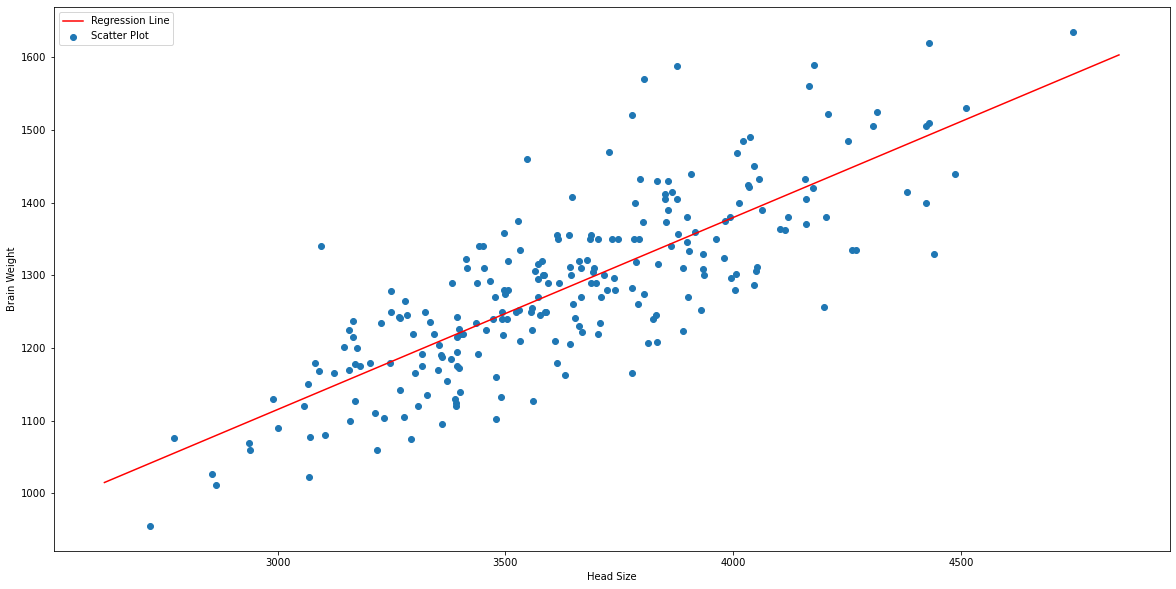

In [17]:
#plotting values 

max_x = np.max(X) + 100
min_x = np.min(X) - 100

# calculating line values x and y

x_values = np.linspace( min_x, max_x, 1000)
y_values = b1*x_values + b0

# plotting line
plt.plot(x_values, y_values, color = 'red', label = 'Regression Line' )
# plotting scatter
plt.scatter(X , y , label = 'Scatter Plot')

plt.xlabel('Head Size')
plt.ylabel('Brain Weight')
plt.legend()
plt.show()

In [18]:
ss_t = 0
ss_r = 0

for i in range(n):
    pred_y = b1*X[i] + b0
    ss_t += (y[i] - mean_y)**2
    ss_r += (y[i] - pred_y)**2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393063772452721


## Linear Regression using Scikit Learn

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = X.reshape((n,1))

reg = LinearRegression()
reg = reg.fit(X,y)
y_pred = reg.predict(X)

r2_score = reg.score(X,y)
print(r2_score)

0.639311719957
